# Decision Trees And Random Forests

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data from kyphosis.csv

In [2]:
data = pd.read_csv("kyphosis.csv")

In [3]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## EDA

**We'll just chechout simple paiplot for the dataset**

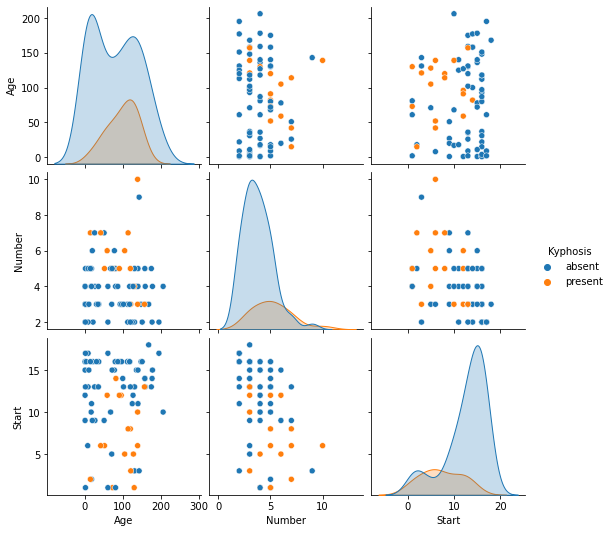

In [5]:
sns.pairplot(data, hue = "Kyphosis")

## Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data.drop("Kyphosis", axis =1)
Y = data["Kyphosis"]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

## Decision Trees

**We'll star by training a single Decision Tree**

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

In [12]:
pred = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

      absent       0.82      0.95      0.88        19
     present       0.67      0.33      0.44         6

    accuracy                           0.80        25
   macro avg       0.74      0.64      0.66        25
weighted avg       0.78      0.80      0.77        25



In [15]:
print(confusion_matrix(Y_test, pred))

[[18  1]
 [ 4  2]]


## Tree Visualizarions

Scikit learn has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to use it

In [16]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features  = list(data.columns[1:])
features

['Age', 'Number', 'Start']

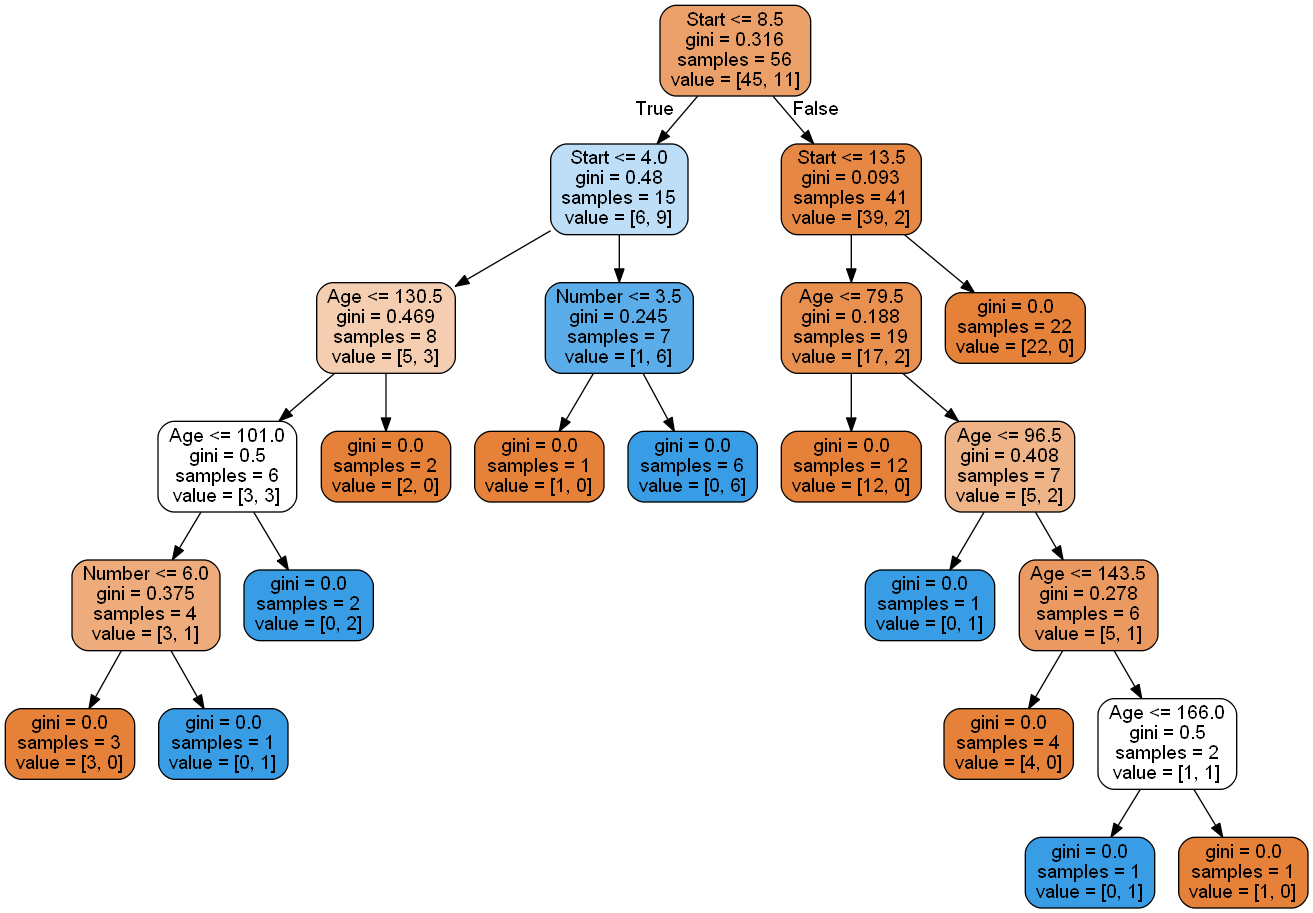

In [17]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, feature_names = features, filled = True,
                rounded = True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Random Forests
Now let's compare the decision tree model to a random forest.

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier(n_estimators = 200)

In [20]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [21]:
rfc_pred = rfc.predict(X_test)

In [22]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [23]:
print(confusion_matrix(Y_test, rfc_pred))

[[19  0]
 [ 5  1]]
